<a href="https://colab.research.google.com/github/silviaaaaaa66/CONI/blob/main/colab_code_common_nighthawk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instance Segmentation - Object Level Classification

### Load clipped tiles (512×512)

In [ ]:
!unzip "/content/drive/MyDrive/Learning/Ornithology/Common Nighthawk Study/test_CVAT_labeling_first_5.zip" -d /content/

Archive:  /content/drive/MyDrive/Learning/Ornithology/Common Nighthawk Study/test_CVAT_labeling_first_5.zip
   creating: /content/test_CVAT_labeling_first_5/
  inflating: /content/__MACOSX/._test_CVAT_labeling_first_5  
  inflating: /content/test_CVAT_labeling_first_5/.DS_Store  
  inflating: /content/__MACOSX/test_CVAT_labeling_first_5/._.DS_Store  
  inflating: /content/test_CVAT_labeling_first_5/obj.data  
  inflating: /content/__MACOSX/test_CVAT_labeling_first_5/._obj.data  
   creating: /content/test_CVAT_labeling_first_5/obj_train_data/
  inflating: /content/__MACOSX/test_CVAT_labeling_first_5/._obj_train_data  
  inflating: /content/test_CVAT_labeling_first_5/train.txt  
  inflating: /content/__MACOSX/test_CVAT_labeling_first_5/._train.txt  
  inflating: /content/test_CVAT_labeling_first_5/data.yaml  
  inflating: /content/__MACOSX/test_CVAT_labeling_first_5/._data.yaml  
  inflating: /content/test_CVAT_labeling_first_5/obj.names  
  inflating: /content/__MACOSX/test_CVAT_labeli

In [ ]:
!python train.py \
  --img 512 --batch 2 --epochs 50 \
  --data /content/test_CVAT_labeling_first_5/data.yaml \
  --weights yolov5s.pt \
  --name gravel_detector


python3: can't open file '/content/train.py': [Errno 2] No such file or directory


### YOLOv5

In [ ]:
# disable Weights & Biases (W&B) for testing
import time
import os
os.environ['WANDB_MODE'] = 'disabled'

In [ ]:
# 1. Clone YOLOv5 repo and install requirements
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17496, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 17496 (delta 2), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17496/17496), 16.54 MiB | 24.83 MiB/s, done.
Resolving deltas: 100% (11990/11990), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00

In [ ]:
# 2. Create data.yaml file for your dataset
data_yaml = """
train: /content/test_CVAT_labeling_first_5/obj_train_data
val: /content/test_CVAT_labeling_first_5/obj_train_data

nc: 1
names: ['gravel_roof']
"""

with open('/content/test_CVAT_labeling_first_5/data.yaml', 'w') as f:
    f.write(data_yaml)

In [ ]:
# 3. Start training
start_time = time.time()

!python train.py --img 512 --batch 2 --epochs 50 \
  --data /content/test_CVAT_labeling_first_5/data.yaml \
  --weights yolov5s.pt \
  --name gravel_detector

end_time = time.time()
duration = end_time - start_time
print(f"\n✅ Training completed in {duration/60:.2f} minutes.")

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-24 20:14:22.187803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750796062.221613   52880 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750796062.232064   52880 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/test_CVAT_labeling_first_5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=2, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=

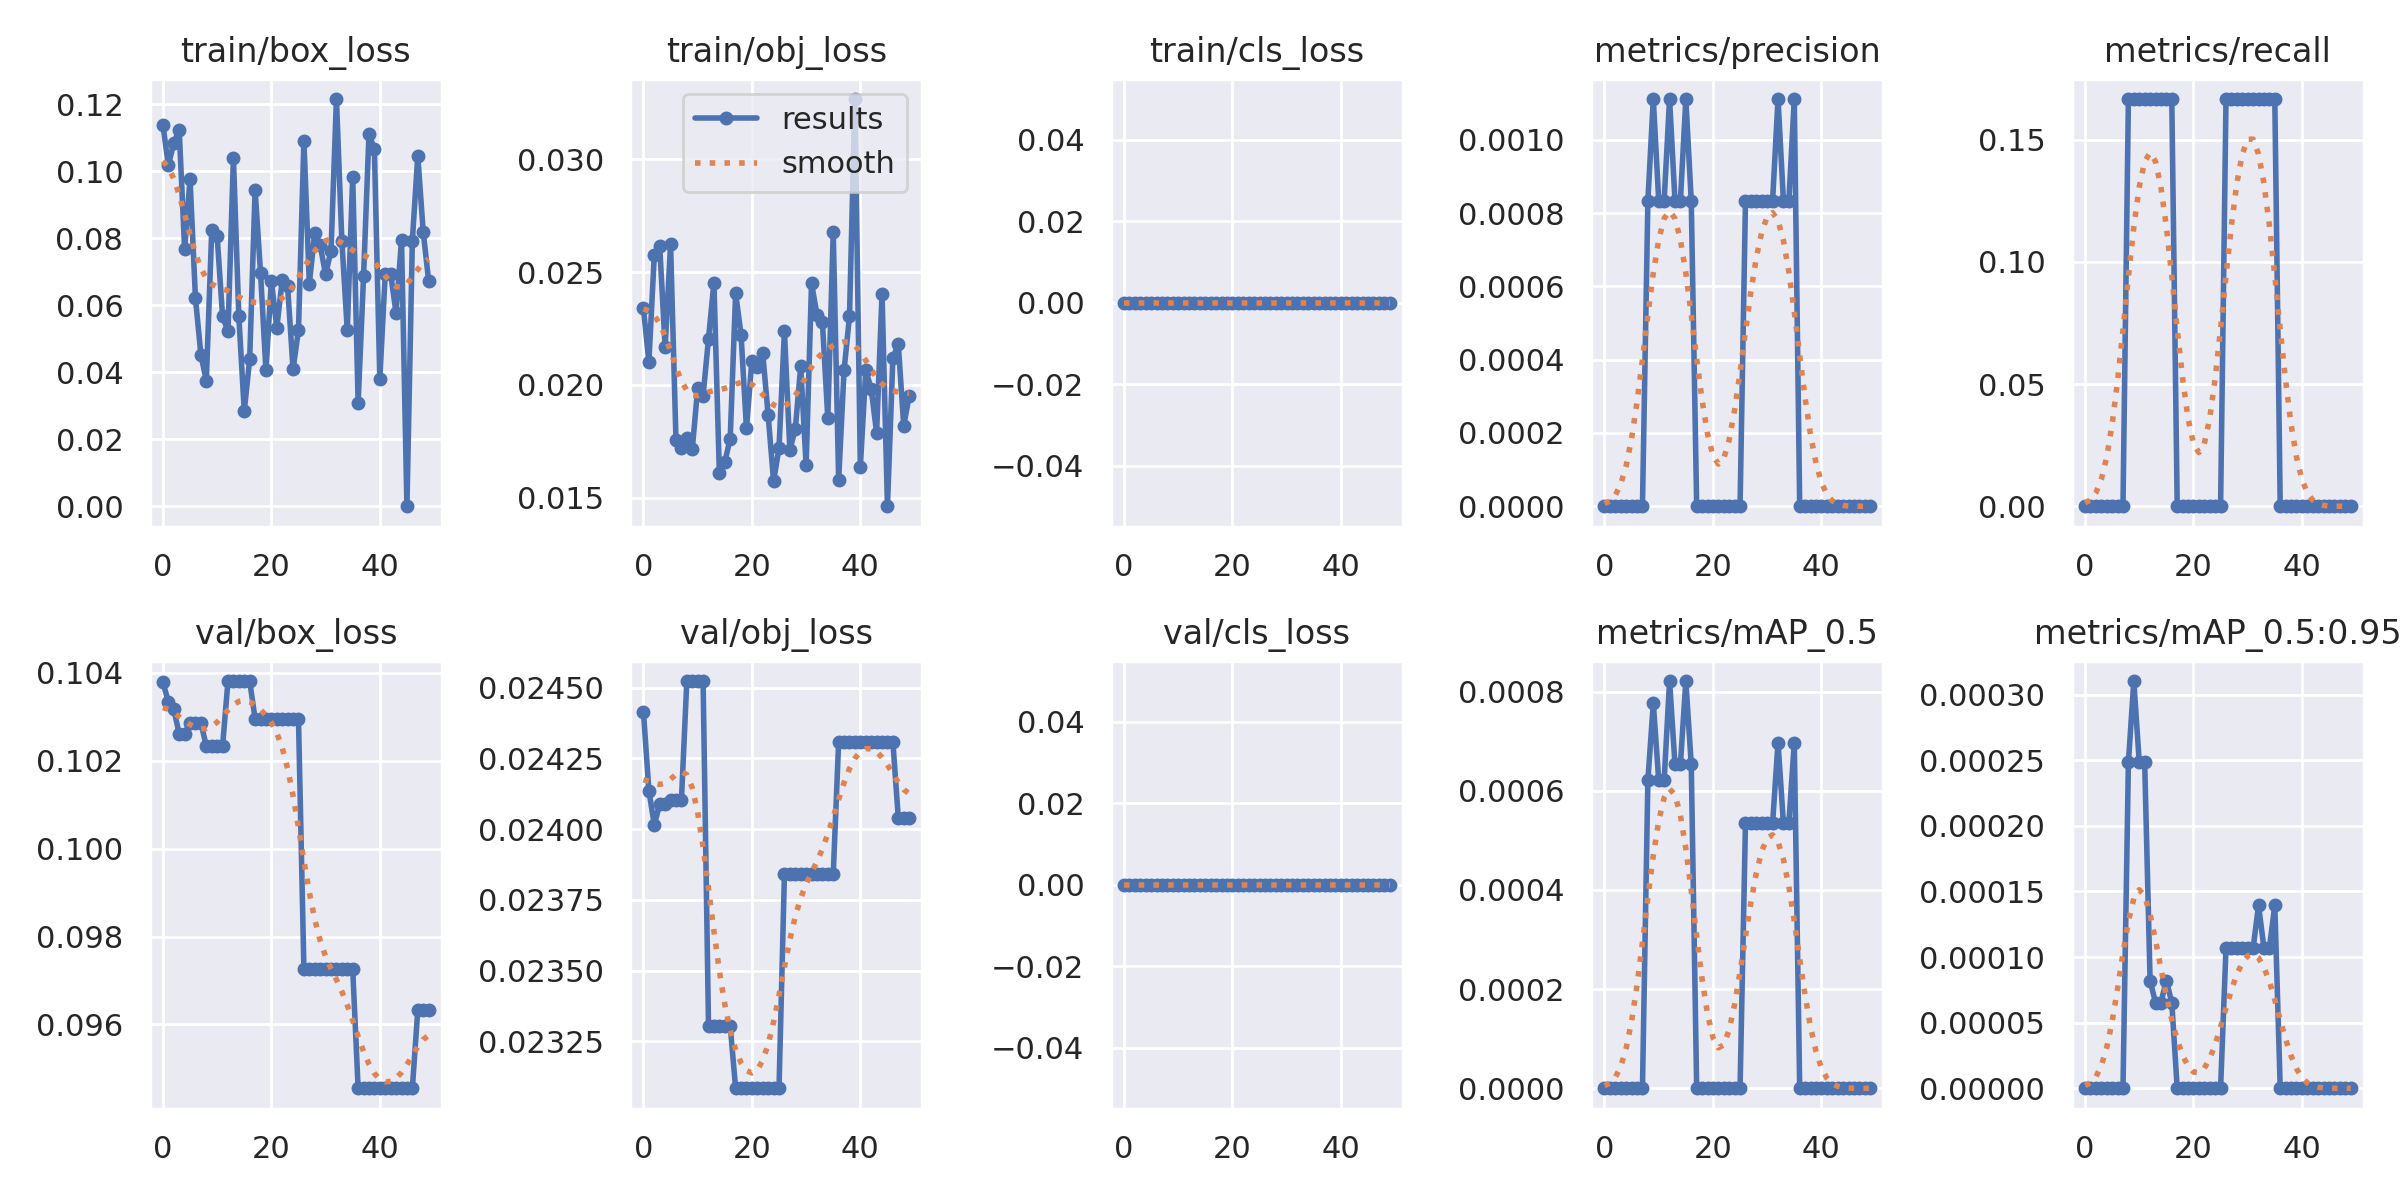

In [ ]:
# View Training Results
from IPython.display import Image, display
display(Image('/content/yolov5/runs/train/gravel_detector/results.png'))


In [ ]:
# convert tif to png
from PIL import Image
import os

folder = '/content/test_CVAT_labeling_first_5/obj_train_data'
for file in os.listdir(folder):
    if file.endswith('.tif'):
        img = Image.open(os.path.join(folder, file)).convert('RGB')
        img.save(os.path.join(folder, file.replace('.tif', '.png')))

In [ ]:
# Run Inference on Training Images
!python detect.py \
  --weights runs/train/gravel_detector/weights/best.pt \
  --img 512 \
  --source /content/test_CVAT_labeling_first_5/obj_train_data \
  --conf 0.1 \
  --name gravel_predictions_png

detect: weights=['runs/train/gravel_detector/weights/best.pt'], source=/content/test_CVAT_labeling_first_5/obj_train_data, data=data/coco128.yaml, imgsz=[512, 512], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=gravel_predictions_png, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/test_CVAT_labeling_first_5/obj_train_data/tile_0.png: 512x512 10 gravel_roofs, 304.2ms
image 2/10 /content/test_CVAT_labeling_first_5/obj_train_data/tile_0.tif: 512x512 10 gravel_roofs, 287.0ms
image 3/10 /content/test_CVAT_labeling_first_5/obj_train_data/t

In [ ]:
# View the Output Images
output_dir = '/content/yolov5/runs/detect/gravel_predictions_png'
print("Files in output directory:", os.listdir(output_dir))
from IPython.display import Image, display
import glob

result_images = glob.glob(f'{output_dir}/*.png')
for img_path in result_images:
    display(Image(img_path))

# Semantic Segmentation - Pixel Level

### GEE Authentication and Initialization

In [ ]:
import ee
import geemap

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='awesome-carver-365303')

# check connection
print(ee.String('Hello from the Earth Engine servers!').getInfo())

Hello from the Earth Engine servers!


### Preprocess Footprint Data Microsoft & CDP - NO NEED TO RERUN

In [ ]:
# Clip Microsoft footprints file to reduce size

import geopandas as gpd
from shapely.geometry import box

# Load downloaded buildings
buildings = gpd.read_file("/content/drive/MyDrive/Learning/Ornithology/Common Nighthawk Study/Microsoft building blueprints/Illinois.geojson")

# Define bounding box roughly around Chicago
chicago_bbox = box(-87.75, 41.75, -87.55, 41.95)

# Clip to Chicago area
chicago_buildings = gpd.clip(buildings, chicago_bbox)

# Filter only Polygon or MultiPolygon geometries
chicago_buildings = chicago_buildings[chicago_buildings.geometry.type.isin(['Polygon', 'MultiPolygon'])]

# Save clipped version
chicago_buildings.to_file("/content/drive/MyDrive/Learning/Ornithology/Common Nighthawk Study/Microsoft building blueprints/chicago_buildings.shp", driver='ESRI Shapefile')

In [ ]:
# Reproject CDP Shapefile to EPSG:4326 Before Upload

from google.colab import files
uploaded = files.upload()

Saving buildings.zip to buildings.zip


In [ ]:
import zipfile
import os

zip_path = 'buildings.zip'
extract_dir = 'chicago_buildings_cdp'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
import geopandas as gpd

# Find .shp file inside the unzipped folder
for file in os.listdir(extract_dir):
    if file.endswith('.shp'):
        shp_path = os.path.join(extract_dir, file)
        break

# Load and reproject
gdf = gpd.read_file(shp_path)
gdf = gdf.to_crs(epsg=4326)

# Save to a new shapefile folder
output_dir = 'reprojected_buildings'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'chicago_buildings_cdp_wgs84.shp')
gdf.to_file(output_path)

In [ ]:
# zip reprojected files
import shutil

shapefile_base = 'chicago_buildings_cdp_wgs84'
shapefile_files = [f for f in os.listdir(output_dir) if shapefile_base in f]

zip_name = 'chicago_buildings_cdp_wgs84.zip'
with zipfile.ZipFile(zip_name, 'w') as zipf:
    for file in shapefile_files:
        zipf.write(os.path.join(output_dir, file), file)

In [ ]:
files.download(zip_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load NAIP and Building Footprints

In [ ]:
#define chicago aoi
# chicago_aoi = ee.Geometry.Rectangle([-87.75, 41.75, -87.55, 41.95])
# cook_county_aoi = ee.Geometry.Rectangle([-88.3, 41.45, -87.5, 42.2])
drone_aoi = ee.Geometry.Rectangle([-87.6565, 41.9617, -87.6380, 41.9692])

test_aoi = ee.Geometry.Rectangle([-87.6565, 41.9617, -87.6380, 41.9692])


# Get a single NAIP image to extract native projection + scale
naip_single = ee.ImageCollection("USDA/NAIP/DOQQ") \
    .filterBounds(chicago_aoi) \
    .filterDate('2023-01-01', '2025-12-31') \
    .first()

native_proj = naip_single.select('R').projection()
scale = native_proj.nominalScale()

# Print to verify
print('Native NAIP resolution (m):', scale.getInfo())

Native NAIP resolution (m): 0.3


In [ ]:
# Load full NAIP mosaic and reproject to native projection
naip = ee.ImageCollection("USDA/NAIP/DOQQ") \
    .filterBounds(chicago_aoi) \
    .filterDate('2023-01-01', '2025-12-31') \
    .mosaic() \
    .clip(chicago_aoi) \
    .reproject(native_proj)

# Select RGBN bands
naip_rgbn = naip.select(['R', 'G', 'B', 'N'])

naip_rgb = naip.select(['R', 'G', 'B'])
naip_rgb = naip_rgb.reproject(crs='EPSG:4326', scale=1)  # or use `scale` variable

# Load uploaded Microsoft building footprints
buildings_microsoft = ee.FeatureCollection("projects/awesome-carver-365303/assets/chicago_buildings_microsoft")

# Load CDP building footprints
buildings_cdp = ee.FeatureCollection("projects/awesome-carver-365303/assets/chicago_buildings_cdp")

# Test aoi
naip_test = ee.ImageCollection("USDA/NAIP/DOQQ") \
    .filterBounds(test_aoi) \
    .filterDate('2023-01-01', '2025-12-31') \
    .mosaic() \
    .clip(test_aoi) \
    .reproject(native_proj)

# buildings_microsoft_test = buildings_microsoft.filterBounds(test_aoi)
buildings_cdp_test = buildings_cdp.filterBounds(test_aoi)

# Create interactive map
Map = geemap.Map(center=[41.85, -87.65], zoom=12)

Map.addLayer(naip_rgbn, {'bands': ['R', 'G', 'B'], 'min': 0, 'max': 255}, 'NAIP Imagery')
Map.addLayer(buildings_microsoft.style(color='red', fillColor='00000000'), {}, 'MS Footprints')
Map.addLayer(buildings_cdp.style(color='red', fillColor='00000000'), {}, 'CDP Footprints')
# Map.addLayer(buildings_microsoft_test.style(color='red', fillColor='00000000'), {}, 'MS Footprints Test')
Map.addLayer(buildings_cdp_test.style(color='red', fillColor='00000000'), {}, 'CDP Footprints Test')

Map

Map(center=[41.85, -87.65], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

Looking at the building footprints, it does seem to be doing a relatively good job identifying rooftops overall, though there are a few issues. However, we will start with this identification and improve it in future stages if needed.

1.   Some rooftop areas are either missing or incorrectly identified.
2.   For the detected rooftops, the identified edges show slight deviations and an overall displacement compared to the actual rooftops — they are not perfectly accurate.

In [ ]:
# create bulding masks
buildings_masked = buildings_cdp.map(lambda f: f.set('presence', 1))

# Convert to raster
building_mask = buildings_masked.reduceToImage(properties=['presence'], reducer=ee.Reducer.first())

# also for test area
buildings_masked_test = buildings_cdp_test.map(lambda f: f.set('presence', 1))

# Convert to raster
building_mask_test = buildings_masked_test.reduceToImage(properties=['presence'], reducer=ee.Reducer.first())


### Try Unsupervised Learning with K-Means Clustering

In [ ]:
# Sample pixels within building footprints using correct scale
training_pixels = naip_rgbn.sampleRegions(
    collection=buildings,
    scale=scale,  # use 0.3 meter scale
    geometries=True,
    tileScale=4
)

# Apply K-means clustering (4 classes for demo)
clusterer = ee.Clusterer.wekaKMeans(4).train(training_pixels)
classified = naip_rgbn.cluster(clusterer)

# Mask classified result to only building areas
# Add dummy value to features
buildings_masked = buildings.map(lambda f: f.set('presence', 1))

# Convert to raster
building_mask = buildings_masked.reduceToImage(properties=['presence'], reducer=ee.Reducer.first())

# Mask the classified image to rooftops only
classified_roofs = classified.updateMask(building_mask)

# Set up map
Map = geemap.Map(center=[41.85, -87.65], zoom=12)

Map.addLayer(naip.select(['R', 'G', 'B']), {'min': 0, 'max': 255}, 'NAIP Imagery')
Map.addLayer(buildings.style(color='red', fillColor='00000000'), {}, 'Building Footprints')
Map.addLayer(classified_roofs, {'min': 0, 'max': 3, 'palette': ['red', 'green', 'blue', 'yellow']}, 'Roof Clusters')

Map

In [ ]:
# reduce size to 1/100 of original area to avoid exceeding computation power
training_pixels_test = naip_rgb.sample(
    region=test_aoi,
    scale=scale,
    numPixels=500,  # limit number of training pixels
    geometries=True
)

# Apply K-means clustering (4 classes for demo)
clusterer_test = ee.Clusterer.wekaKMeans(4).train(training_pixels_test)
classified_test = naip_rgbn.cluster(clusterer_test)

# Mask classified result to only building areas
# Add dummy value to features
buildings_masked_test = buildings_test.map(lambda f: f.set('presence', 1))

# Convert to raster
building_mask_test = buildings_masked_test.reduceToImage(properties=['presence'], reducer=ee.Reducer.first())

# Mask the classified image to rooftops only
classified_roofs_test = classified_test.updateMask(building_mask_test)

# Set up map
Map_test = geemap.Map(center=[41.85, -87.65], zoom=12)

Map_test.addLayer(naip_test.select(['R', 'G', 'B']), {'min': 0, 'max': 255}, 'NAIP Imagery')
Map_test.addLayer(buildings_test.style(color='red', fillColor='00000000'), {}, 'Building Footprints')
Map_test.addLayer(classified_roofs_test, {'min': 0, 'max': 3, 'palette': ['red', 'green', 'blue', 'yellow']}, 'Roof Clusters')

Map_test

### Try Rule-Based Gravel Mask (NAIP)

In [ ]:
# Step 1: Define a rule-based gravel mask
# These thresholds are based on common gravel reflectance: bright, low vegetation
gravel_mask = naip_rgbn.expression(
    '(R > 160) && (G > 150) && (B > 140) && ((NIR - R) < 20)',
    {
        'R': naip_rgbn.select('R'),
        'G': naip_rgbn.select('G'),
        'B': naip_rgbn.select('B'),
        'NIR': naip_rgbn.select('N')
    }
)

# Step 2: Mask everything outside of buildings
gravel_on_roofs_test = gravel_mask.updateMask(building_mask_test)

# Step 3: Visualize
Map_test.addLayer(gravel_on_roofs_test.selfMask(), {'palette': ['white']}, 'Rule-Based Gravel Mask')

Map_test

### Try Supervised Random Forest Model

In [ ]:
# Load training points
training_points_test = ee.FeatureCollection("projects/awesome-carver-365303/assets/gravel_training_test")

Map.addLayer(training_points_test, {}, 'Training Points')

# Sample NAIP image at training points
training_test = naip_rgbn.sampleRegions(
    # Randomly sample 2000 points max for training due to memory limit exceeded
    collection=training_points_test,
    # .randomColumn().sort('random').limit(2000),
    properties=['class'],
    scale=scale,
    tileScale=16
)

In [ ]:
# Train a Random Forest classifier
classifier_test = ee.Classifier.smileRandomForest(50).train(
    features=training_test,
    classProperty='class',
    inputProperties=['R', 'G', 'B', 'N']
)

# Mask outside buildings
classified_roofs_test = naip_test.classify(classifier_test).updateMask(building_mask_test)

In [ ]:
# Visualize
Map.addLayer(classified_viz, {'min': 0, 'max': 1, 'palette': ['blue', 'white']}, 'Gravel (1) vs Non-Gravel (0)')
Map

In [ ]:
# export
# Define export region
export_region = test_aoi

# Set up export task
export_task = ee.batch.Export.image.toDrive(
    image=classified_roofs_test.byte(),  # convert to byte for smaller file
    description='gravel_roof_classification_test',
    folder='earthengine',
    fileNamePrefix='gravel_classified',
    region=export_region,
    scale=scale,
    maxPixels=1e13
)

# Start the export
export_task.start()

In [ ]:
# Export NAIP imagery for the same area
naip_export_task = ee.batch.Export.image.toDrive(
    image=naip_rgb,
    description='naip_rgb_export',
    folder='earthengine',
    fileNamePrefix='naip_rgb',
    region=export_region,
    scale=scale,
    maxPixels=1e13
)
naip_export_task.start()


In [ ]:
naip_export_task.status()

{'state': 'COMPLETED',
 'description': 'naip_rgb_export',
 'priority': 100,
 'creation_timestamp_ms': 1750714243248,
 'update_timestamp_ms': 1750714656226,
 'start_timestamp_ms': 1750714249751,
 'task_type': 'EXPORT_IMAGE',
 'destination_uris': ['https://drive.google.com/#folders/105n6Us_n8Yg79QGfl4mm-ETXI1q-6pCY'],
 'attempt': 1,
 'batch_eecu_usage_seconds': 86.55918884277344,
 'id': 'L4HIFBJNH5QPTONY7VECDJUD',
 'name': 'projects/awesome-carver-365303/operations/L4HIFBJNH5QPTONY7VECDJUD'}